In [1]:
# Questa cella carica tutte le librerie utili nelle seguenti parti di codice
# Markdown in code
from IPython.display import Markdown as md
from IPython.display import Latex
# Image mainipulation
from IPython.display import display # Modulo con strumenti di visualizzazione in IPython
# widgets
import ipywidgets as widgets
from ipywidgets import HBox, VBox
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# %matplotlib inline

# Integrazione Numerica

## Credits and Rights

Questo notebook è stato originariamente creato dal Prof. Mirco Zerbetto; variazioni sono state apportate da Agostino Migliore.

## 1 Introduzione
Il calcolo di aree (o volumi, o ipervolumi) è una problematica che si riscontra quando la quantità che si vuole determinare rappresenta una misura cumulativa di una osservabile del sistema che si sta analizzando in funzione di una o più variabili da cui dipende l'osservabile. Di seguito si riporta qualche esempio.  

##### Esempio 1. Determinazione della quantità di un analita da una misura HPLC

Per determinare la quantità di un analita tramite HPLC si devono preparare delle soluzioni di quell'analita (possibilmente nella medesima matrice) che abbiano concentrazione nota e variabile. Dalla misura HPLC di ciascuno di tali standard si determina una relazione tra l'**area** del picco e la concentrazione dell'analita nello standard. Nota la relazione lineare, si esegue la misura sul campione e una volta determinata l'area del picco, si risale alla concentrazione dell'analita nel campione tramite la retta di taratura.

##### Esempio 2. Determinazione della resa quantica di fluorescenza

Per determinare la resa quantica di fluorescenza di una molecola bisogna preparare una soluzione di una sostanza per la quale la resa quantica sia nota nelle condizioni sperimentali (matrice). La resa quantica è proporzionale al rapporto tra le aree dei picchi di emissione della sostanza nota e di quella incognita.

##### Esempio 3. Determinazione della costante di *binding* di un substrato a un enzima

Per determinare la costante di equilibrio della formazione di un addotto enzima-substrato si usa la titolazione calorimetrica isoterma (ITC, *isothermal titration calorimetry*) in cui si misura il calore sviluppato (o assorbito) dalla reazione di *binding* via via che si titola l'enzima con il substrato. Il grafico che mette in relazione il tasso di variazione del calore in funzione del tempo dopo ogni aggiunta è costituito da molti picchi. L'area sottesa a ciascuno dei picchi è il calore sviluppato nel lasso di tempo in cui il sistema, a seguito dell'aggiunta del substrato, ha raggiunto un nuovo stato di equilibrio.

## 2 Calcolo di integrali per via numerica
In tutti gli esempi sopra citati si deve calcolare l'integrale
$$
I=\int_a^b f(x)dx
$$
dove $\Omega=(b-a)$ è il dominio di integrazione, mentre $f(x)$ in tutta generalità è una funzione della quale non si conosce l'espressione analitica o per la quale è difficile (o impossibile) calcolare la primitiva. Lo scopo è trovare un'approssimazione numerica all'integrale.

 Geometricamente, l'integrale sopra riportato è l'area sottesa alla funzione $f(x)$ entro il dominio $\Omega$.  
<br>

<pass/> <div align="center"><div style="width: 400px">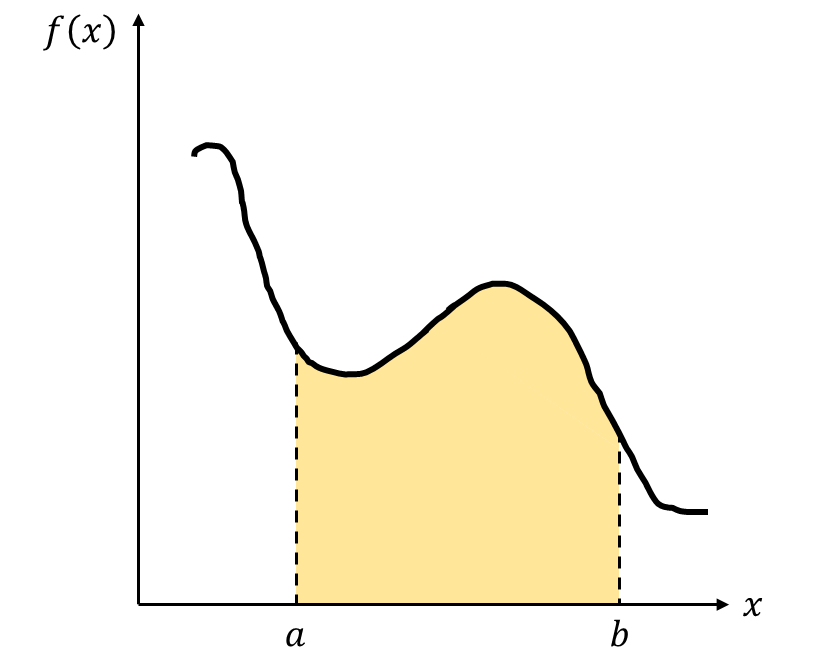</div></div>
<br>
 
 Secondo la definizione di integrale di Riemann, data una partizione di $\Omega$ in $n$ intervalli di larghezza $\Delta=\Omega/n$ e dati i centri di tali intervalli: $x_j=a+(j-\frac{1}{2})\Delta$, l'approssimazione $I_n$ a $I$ è data da
$$
    I_n=\Delta \sum_{j=1}^{n} f(x_j)
$$
Equivalentemente, si può scrivere
$$
    I_n=\Delta \sum_{j=0}^{n-1} f(x_j)
$$
con $x_j=a+(j+\frac{1}{2})\Delta$, in armonia col fatto che Python conta sempre a partire da zero.  
L'integrale è quindi approssimato dalla somma delle aree di $n$ rettangoli, il $j$-esimo dei quali ha altezza pari a $f_j=f(x_j)$ e come base $\Delta$. L'integrale di Riemann di $f(x)$ su $\Omega$ diventa pari a $I$ se, per qualsiasi numero $\epsilon>0$ arbitrariamente piccolo, esiste un valore di $n$ tale che
$$
|I-I_n|<\epsilon
$$
  
La definizione di integrale di Riemann può anche essere vista come un semplice metodo numerico per il calcolo di un integrale: il cosiddetto **metodo dei rettangoli**. Con tale metodo, se la derivata $f'(x)$ è limitata superiormente in $\Omega$, allora l'errore che si commette è:
$$
E_n\leq\frac{(b-a)^2}{2n}\sup_{a\leq x\leq b}|f'(x)|
$$
<br>

### 2.1 Esempio
Calcolo con il metodo dei rettangoli dell'integrale di $f(x)=x e^x$ per $x\in[0,1]$. L'esito analitico dell'integrale (che si risolve per parti) è 1.

In [2]:
def rettangoli(n):

    # Estremi di integrazione
    a = 0
    b = 1
    Omega = b - a

    # Suddivisione in intervalli
    Delta = Omega / float(n)
    
    # Ciclo che riempie gli array dei punti centrali dei rettangoli
        # Con la funzione np.empty() si crea una ndarray della forma desiderata
        # senza inizializzare i valori degli elementi.
    x = np.empty([n, 1])
    f = np.empty([n, 1])
    for j in range(0,n):
        x[j] = a + (float(j) + 0.5) * Delta
        f[j] = x[j] * np.exp(x[j])  # Usiamo una ufunc di NumPy.

    # Ciclo che riempie gli array dei punti estremi dei rettangoli
    xp = np.empty([n+1, 1])
    fp = np.empty([n+1, 1])
    for j in range(0,n+1):
        xp[j] = a + float(j) * Delta
        fp[j] = xp[j] * np.exp(xp[j])  

    # Grafico della funzione
    fig, ax = plt.subplots()
    ax.plot(xp,fp,color="red",linewidth=2.0)
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.rcParams["figure.figsize"] = (6,6)

    
    # Aggiunge i rettangoli
    for j in range(0,n):
        ax.add_patch(Rectangle((xp[j], f[j]), Delta, -f[j], 
        facecolor='none', edgecolor='blue', linewidth=1.0))

    # Mostra il plot
    plt.show()

    # Calcola l'integrale numericamente
    In = 0.0;
    for j in range (0,n):
        In = In + f[j]
    In = In * Delta

    print("La stima dell'integrale è In = %.4f" % (In[0]))
    print("L'errore massimo stimato è: %.4f" % (2*np.e*0.5/float(n)))

widgets.interactive(rettangoli, n=(1,100,1))

interactive(children=(IntSlider(value=50, description='n', min=1), Output()), _dom_classes=('widget-interact',…

Si può usare la barra presente prima del grafico per selezionare il valore di $n$.  
Si noti che, mentre quello scritto nell'ultima riga di output rappresenta un limite superiore per l'errore in generale (cioè, quale che sia la funzione integranda, purché sia ovviamente integrabile), in questo caso l'errore realmente commesso è molto più basso di tale limite, come mostra il confronto del risultato con il valore esatto atteso.

## 3 Esercizi
Integrare numericamente queste funzioni:
<ol>
<li>$\int_0^1 x^2dx$</li><br>
<li>$\int_1^2 \frac{1}{1+x^2}dx$</li><br>
<li>$\int_0^1 \sqrt{x^4+1}dx$</li>
</ol>

Di seguito il codice per risolvere il primo esercizio.  
  
Prima di tutto, si definisce una funzione che prende in ingresso un valore di $x$ e restituisce il valore della funzione $y=x^2$:

In [3]:
def y1(x):
    return x**2

Si inizializzano gli estermi di integrazione ($a$, $b$), il numero di intervalli ($n$), e l'ampiezza dell'intervallo ($\Delta$):

In [4]:
n = 20; # n è un intero
a = 0.0 # a e b sono in genere floats
b = 1.0
Delta = (b-a) / n

Una volta inizializzato il valore dell'integrale, $I_n$, a zero, in un ciclo per $j$ che va da 1 a $n$ si accumula il valore della funzione calcolata nei punti $x_j=a+(j-1/2)\Delta$. Infine, fuori dal ciclo, si moltiplica l'esito di tale somma per $\Delta$.

In [5]:
In = 0.0

for j in range(1, n+1):
    xj = a + (j - 0.5) * Delta
    # Dato che 0.5 è un float, j è convertito in float; altrimenti
    # era bene usare float(j) per essere sicuri che xj fosse un float
    In = In + y1(xj);

In = In * Delta;

print("La stima dell'integrale è: %.3f" % (In));

La stima dell'integrale è: 0.333


Per risolvere gli altri esercizi, si consiglia di riscrivere il codice completo aggiungendo una cella "codice" qui sotto.

## 4 Altri modi di integrazione
Il metodo dei rettangoli è l'approccio numerico più semplice alla stima di un integrale per via numerica. Esistono metodi migliori che, pur basandosi sulla discretizzazione dell'intervallo di integrazione, approssimano in maniera più precisa l'andamento della funzione all'interno degli intervalli di ampiezza $\Delta$.
<br>

### 4.1 Metodo dei trapezi
Nel metodo dei trapezi la funzione $f(x)$ all'interno dell'intervalo $[x_j-\Delta/2,x_{j}+\Delta/2]$, dove $x_j = a + \left(j+\tfrac{1}{2}\right)\Delta \ (j = 0, 1, ..., n)$, viene approssimata da un segmento che congiunge i punti sulla curva agli estremi dell'intervallo, cioè $(x_j-\Delta/2, f(x_j-\Delta/2))$ e $(x_j+\Delta/2, f(x_j+\Delta/2))$. In questo modo, l'area viene approssimata dalla somma delle aree di $n$ trapezi:
$$
I_n=\frac{\Delta}{2} \sum_{j=1}^{n}\left[f\left(x_j-\frac{\Delta}{2}\right)+f\left(x_j+\frac{\Delta}{2}\right)\right]=\frac{\Delta}{2}\left[f(a)+2\sum_{j=1}^{n-1}f(a+j\Delta)+f(b)\right]
$$
Si noti che in questo metodo (come in tutti gli altri) i punti non devono essere necessariamente equispaziati: in generale, semplicemente si portano dentro la sommatoria gli intervalli $\Delta_j=x_{j}-x_{j-1}$.

### 4.2 Metodo di Simpson
Nel metodo di Simpson, invece, la funzione nell'intervallo tra due punti consecutivi $x_j$ e $x_j+\Delta$ viene approssimata da un polinomio di grado $M$. In genere si usano un'interpolazione quadratica,
detta *regola di Cavalieri-Simpson* o anche *regola 1/3 di Simpson*, oppure una cubica, detta *regola di Cavalieri-Simpson con fattore 3/8* o anche semplicemente *regola 3/8 di Simpson*.

##### Regola 1/3 di Simpson
$$
I_n=\frac{\Delta}{3}\left[f(a)+4\sum_{j=1}^{n/2}f[x+(2j-1)\Delta]+2\sum_{j=1}^{n/2-1}f(x+2j\Delta)+f(b)\right]
$$
<br>

##### Regola 3/8 di Simpson
$$
I_n=\frac{3\Delta}{8}\left[f(a)+3\sum_{j=1,\ j/3\ \notin\ \mathbb{N}}^{n-1}f(x+j\Delta)+2\sum_{j=1}^{n/3-1}f(x+3j\Delta)+f(b)\right]
$$
<br>

**N.B.**: Per funzioni *smooth* Il metodo di Simpson fornisce la stima più accurata dell'integrale di una funzione, a partià di $n$. Viceversa, per funzioni che presentano picchi molto pronunciati i metodi dei rettangoli e dei trapezi sono più accurati. Infine, menzioniamo pure che in analisi numerica le formule viste sopra sono collettivamente chiamate *formule di Newton-Cotes*, in onore del fisico e matematico Isaac Newton e del matematico Roger Cotes.
<br><br><br>

## 5 Integrazione di una funzione nota per punti
Spesso accade che la funzione da integrare sia nota per punti, ossia, dato il dominio $[a,b]$, la funzione è nota per una sequenza di $n$ punti $x_1, \dots, x_n\in[a,b]$ con $x_1=a$ e $x_n=b$, di solito equispaziati. Le espressioni per i medodi non cambiano. Cambia solo il significato dell'area calcolata con il metodo dei rettangoli: non si tratta più di rettangoli costruiti sul punto di mezzo degli intervalli, ma sull'estremo inferiore. Rimane il fatto che nel limite di intervalli infinitamente piccoli, l'approssimazione numerica tende al valore vero.

**Esempio.** Il file "pulse.dat" nella sottocartella "data" riporta la forma di un impulso laser utilizzato in un esperimento di ablazione di un metallo per ottenere nanoparticelle. I dati sono in formato ASCII, organizzati in due colonne di numeri: la prima sono i valori del tempo ($t$) in ns, la seconda i valori della potenza ($P(t)$) del laser in kW. Si vuole calcolare l'energia complessiva che l'impulso laser trasferisce al metallo. Si deve integrare la potenza (funzione del tempo) nell'arco temporale di durata dell'impulso: $$E=\int_0^{t_\texttt{max}}dt P(t)$$  
  
Il codice seguente mostra come leggere il contenuto del file per raccogliere i valori di $t$ e $P$ in due arrays, mostrare il grafico di tali dati sperimentali e usarli per stimare l'integrale con il metodo dei rettangoli.

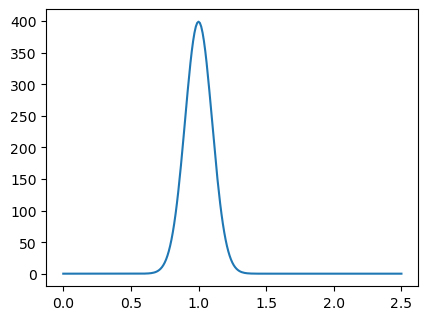

L'energia complessiva dell'impulso vale 0.10 J


In [18]:
# Allocazione di arrays per t e P e inizializzazione di n
t = []
P = []
n = 0

# Lettura del file di dati e riempimento degli arrays t e P
with open("MCC_data/pulse.dat","r") as f:
    for line in f:
        sl = line.split() # suddivide la riga in corrispondenza degli spazi,
                          # generando un array di due elementi
        t.append(float(sl[0]))
        P.append(float(sl[1]))
        n += 1

# Grafico dei dati sperimentali
plt.figure(figsize=(4.8,3.6))
plt.plot(t,P)
plt.show()

# Larghezza dell'intervallo, assumendo valori di t equispaziati
Delta = t[1] - t[0]

# Calcolo dell'integrale numerico con il metodo dei rettangoli
In = 0.0

for j in range(0, n):
    In = In + P[j]

In = (In * 1.0e3) * (Delta * 1.0e-6)  # Nella formula In è trasfromato in W
                                      # e Delta in s per ottenere l'energia in J

# Scrittura in output dell'esito
print("L'energia complessiva dell'impulso vale %.2f J" % (In))

## 6 Nota
Generalmente, quando viene richiesta un'integrazione numerica di dati di laboratorio, la funzione da integrare è già nota per punti discreti, per cui non è necessario eseguire la discretizzazione del dominio di integrazione. Ad esempio, da una analisi HPLC, la funzione da integrare è il segnale misurato in funzione del tempo a intevalli di tempo regolari $\delta t$ e il dominio di integrazione viene definito come quell'intervallo temporale entro il quale il picco si distingue dalla linea di base (e da eventuale rumore del segnale).  
Inoltre, nei problemi da risolvere, generalmente si hanno a disposizione file ASCII formattati in due colonne: la prima contiene il valore della variabile indipedente, la seconda il valore corrispondente della variabile dipendente.

## 7 Approfondimenti

### 7.1 Esercizio: errore massimo del metodo dei rettangoli

**(a)** Ricavate la formula per l'errore massimo in cui si può incorrere integrando con il metodo dei rettangoli, facendo uso delle somme di Riemann *inferiore* e *superiore* (o *sinistra* e *destra*) mostrate nella figura di sotto.  
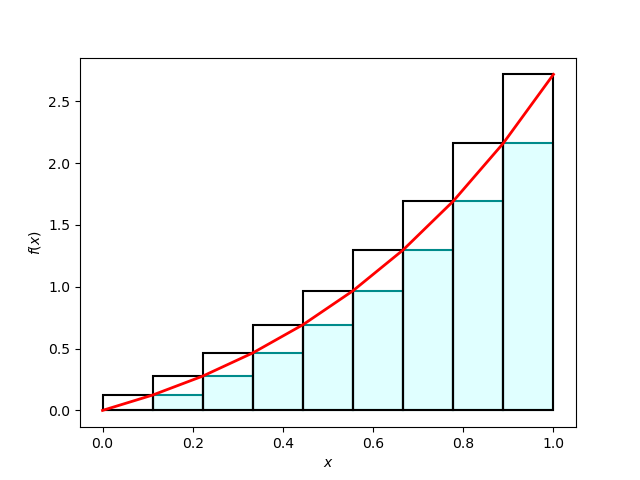

**(b)** Sfruttando il codice nell'esempio della sezione __2.1__, create un codice che faccia la figura di cui sopra.

### 7.2 Integrazione di funzioni di più variabili

Quanto detto sopra per l'integrazione numerica di funzioni di una variabile si può estendere a funzioni di più variabili. Si considerei il caso più semplice del metodo dei rettangoli. Se la funzione da integrare è $f=f(x,y)$, allora il volume sotteso dalla superficie (la curva è adesso diventata una superficie) entro il dominio di integrazione sarà approssimato dalla somma di $n_x\times n_y$ parallelepipedi, dove $n_x$ è il numero di punti in cui è discretizzato il dominio lungo la variabile $x$, e $n_y$ è il numero di punti in cui è deiscretizzato il dominio lungo $y$.  

Per quanto tale estensione a più dimensioni sia banale, l'utilizzo di metodi di discretizzazione del dominio diventa impraticabile già con funzioni di 4 variabili. Assumendo che tutte le dimensioni del domnio siano discretizzate in 100 punti, e che per ciclare su una dimensione ci voglia 1 s di calcolo, per ciclare su 2 dimensioni ci vorrebbero 100 s (un minuto e 40 s), su 3 dimensioni si passerebbe a 10000 s (circa 3 ore) e, infine, per 4 dimensioni ci vorrebbero 1000000 s (quasi due settimane!).  

Per integrare funzioni di più varianbili vi sono altri metodi. Quello storicamente più importante è il metodo **Monte Carlo** (MC). Nella sua versione più elementare, l'idea del metodo (come avrà già suggerito a qualcuno il nome) si basa sulla casualità: il calcolo dell'integrale è basato sulla teoria delle probabilità. Sia $\mathbf{x}=[x_1,\dots,x_M]$ l'array delle $M$ variabili indipendenti da cui dipende la funzione $f=f(\mathbf{x})$. L'integrale da calcolare sul dominio $\mathbf{\Omega}$ è interpretabile come la media della funzione su una densità di probabilità $p(\mathbf{x})$:
$$
I=\int_{\mathbf{\Omega}}d\mathbf{x}f(\mathbf{x})=V\int_\mathbf{\Omega}d\mathbf{x}f(\mathbf{x})p(\mathbf{x})
$$
dove $V$ è il volume del dominio di integrazione. In questo caso la densità di probabilità è uniforme e affinchè sia normalizzata a 1, deve valere $p(\mathbf{x})=1/V$. Data questa interpretazione statistica, l'integrale è una media della funzione $f(\mathbf{x})$ su una densità di probabilità uniforme:
$$
I=V\langle f\rangle\approx V\frac{1}{n}\sum_{j=1}^n f(\mathbf{x}_n)=I_n
$$
dove $\langle\dots\rangle$ indica una media su una densità di probabilità e la sequenza di punti $\mathbf{x}_1,\dots,\mathbf{x}_n\in\mathbf{\Omega}$ è un insieme di $n$ punti del dominio di integrazione campionati *casualmente* dalla distribuzione uniforme. La statistica assicura che $\lim_{n\rightarrow \infty}I_n=I$.  
  
Il metodo MC risulta utile anche in quei casi in cui il dominio di integrazione non è facilemente definibile, ad esempio perché irregolare su un piano o in un ipervolume.  

Un tipico esempio di utilizzo del metodo MC è la stima di $\pi$ a partire dalla stima dell'area di un cerchio di raggio unitario. A tal fine, si consideri la funzione:
$$
f(x,y)=\left\{\begin{array}{ll}1&\mbox{se }x^2+y^2\leq 1\\0&\mbox{altrove}\end{array}\right.
$$
e la si integrari sul dominio $\mathbf{\Omega}=[-1,1]\times[-1,1]$, che ha volume $V=4$.  
Ottenendo un numero $n$ di coppie $(x,y)$ da un campionamento casuale sia di $x$ che di $y$ da una distribuzione uniforme tra -1 e 1, si può approssimare l'area del cerchio a raggio unitario a:
$$
I_n=\frac{4}{n}\sum_{j=1}^n f(x_j,y_j)
$$
Il risultato analitico è $\pi$. Il codice che segue implementa il calcolo dell'integrale con il metodo MC. Modificando il valore della variabile *throws* ($n$) si cambia l'accuratezza del calcolo.  
Si noti come, eseguendo due volte di seguito il calcolo a parità di $n$, si ottengano risultati diversi: il MC è un metodo *stocastico* per la stima degli integrali, che usa mumeri generati in modo random, a differenza dei metodi presentati sopra che sono, invece, deterministici.

In [7]:
from numpy import random
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D

def MC(n):

    # Mostra il dominio di integrazione e il cerchio.
    fig, ax = plt.subplots(figsize=(6,6))
    circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0, 0), linewidth=3, alpha=1)
    ax.add_patch(circle)
    
    throws = n
    inside_circle = 0
    i = 0
    radius = 1
    
    while i < throws:
        # Mostra punti (x, y) attorno a (0,0).
        x = random.uniform(-radius, radius)
        y = random.uniform(-radius, radius)
        # Se il punto è dentro il cerchio, aumenta il valore della variabile
        if x**2 + y**2 <= radius**2:
            inside_circle += 1

        # Aggiungi punti rossi per rappresentare i punti random (x,y).
        plt.plot(x, y, 'o', color=(1.0, 0.0, 0.0), alpha=1.0)
       
        i += 1

    plt.xlim([-1, 1])
    plt.xlabel("$x$")
    plt.ylim([-1, 1])
    plt.ylabel("$y$")
    plt.show()
    
    # Calcola l'area e stampa; aumentando il numero di throws, l'approssimazione migliora.
    area = (((2 * radius) ** 2) * inside_circle) / throws
    print("Area = %.8f" % area)
    print ("Errore relativo = %.2f %%" % (100.0*(np.pi - area)/np.pi))

In [8]:
# Controlli interattivi
ta = widgets.Textarea(value="100", description='Throws:', rows=1, disabled=False)
button = widgets.Button(description='Run!', disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Run MC calculation',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
out = widgets.Output(layout={'border': '0px solid black'})

box = widgets.Box(children=[ta, button])
display(box, out)

def on_button_clicked(b):
    out.clear_output();
    with out:
        MC(int(ta.value))
    
button.on_click(on_button_clicked) 

Box(children=(Textarea(value='100', description='Throws:', rows=1), Button(description='Run!', icon='check', s…

Output(layout=Layout(border_bottom='0px solid black', border_left='0px solid black', border_right='0px solid b…